In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from wordcloud import WordCloud

#### **Data Exploration**

In [ ]:
# Load the dataset
tagalog_df = pd.read_excel('tagalog-words.xlsx')
tagalog_df.info()
tagalog_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45831 entries, 0 to 45830
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   letter      45831 non-null  object
 1   word        45831 non-null  object
 2   definition  45831 non-null  object
 3   dialect     45831 non-null  object
 4   sentiment   17639 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


,letter,word,definition,dialect,sentiment
0,a,aalug-alog,aalug-alog adj. shaky; rickety,tagalog,negative
1,a,aam,aam n. broth made from boiled rice,tagalog,NaN
2,a,aanga-anga,aanga-anga adj. remaining agape for some time,tagalog,NaN
3,a,aapa-apa,aapa-apa adj. groping around,tagalog,NaN
4,a,aba,aba adj. poor; humble; subservient,tagalog,negative


In [92]:
# Check for unique, missing and duplicated values
inspection_df = pd.DataFrame({
    'Unique': tagalog_df.nunique(),
    'Missing': tagalog_df.isnull().sum(),
    'Type': tagalog_df.dtypes,
    'Sample': tagalog_df.loc[0],
    'Duplicate': tagalog_df.duplicated().sum()
})
inspection_df

,Unique,Missing,Type,Sample,Duplicate
letter,23,0,object,a,73
word,42730,0,object,aalug-alog,73
definition,43952,0,object,aalug-alog adj. shaky; rickety,73
dialect,1,0,object,tagalog,73
sentiment,2,28192,object,negative,73


#### **Data Preprocessing**

In [93]:
# Remove duplicated samples
tagalog_df.drop_duplicates(inplace=True)
tagalog_df.duplicated().sum()

0

In [94]:
# Replace missing sentiment with 'neutral'
tagalog_df['sentiment'] = tagalog_df['sentiment'].replace({np.NaN:'neutral'})
tagalog_df['sentiment'].value_counts()

sentiment
neutral     28147
negative    11635
positive     5976
Name: count, dtype: int64

In [ ]:
# Clean the dataset by removing invalid samples
dataset_samples = tagalog_df.shape[0]

# Remove samples with whitespace, uppercase letters, special characters, numbers, punctuation and duplicates
tagalog_df = tagalog_df[~tagalog_df['word'].str.contains(r'\s')]
tagalog_df = tagalog_df[~tagalog_df['word'].str.contains(r'[A-Z]')]
tagalog_df = tagalog_df[~tagalog_df['word'].str.contains(r'[@$!%*#?&]')]
tagalog_df = tagalog_df[~tagalog_df['word'].str.contains(r'\d')]
tagalog_df = tagalog_df[~tagalog_df['word'].str.contains(r'[{}]'.format(string.punctuation))]
tagalog_df = tagalog_df.drop_duplicates(subset=['word'], keep='first')

# Count the removed samples
removed_samples = dataset_samples - tagalog_df.shape[0]
print(f'Removed samples: {removed_samples}')

Removed samples: 9902


In [96]:
# Drop unnecessary columns
tagalog_df.drop(columns=['letter', 'definition', 'dialect'], inplace=True)
tagalog_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35856 entries, 1 to 45830
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   word       35856 non-null  object
 1   sentiment  35856 non-null  object
dtypes: object(2)
memory usage: 840.4+ KB


#### **Data Visualization**

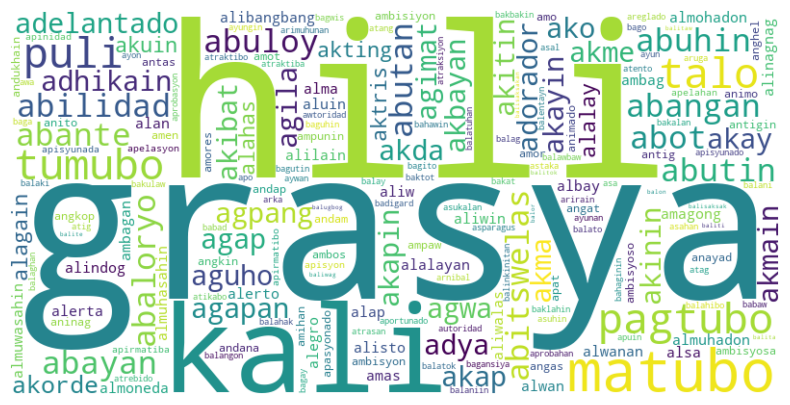

In [ ]:
# Visualize the word cloud for the positive sentiment
positive_words = tagalog_df[tagalog_df['sentiment'] == 'positive']['word']
all_positive_words = ' '.join(positive_words)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white')
positive_wordcloud.generate(all_positive_words)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

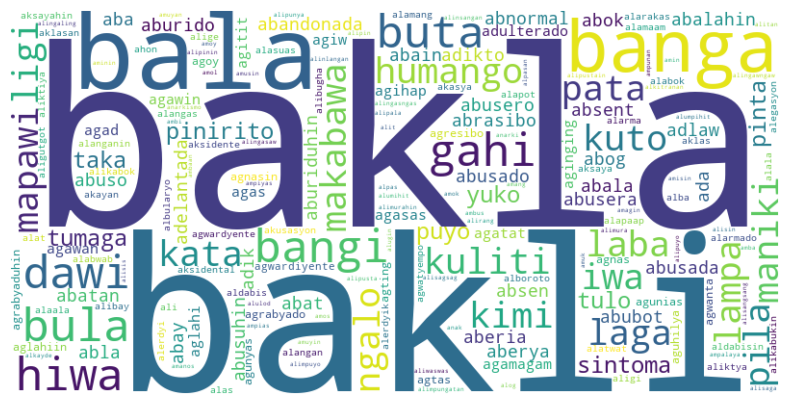

In [ ]:
# Visualize the word cloud for the negative sentiment
negative_words = tagalog_df[tagalog_df['sentiment'] == 'negative']['word']
all_negative_words = ' '.join(negative_words)

negative_wordcloud = WordCloud(width=800, height=400, background_color='white')
negative_wordcloud.generate(all_negative_words)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

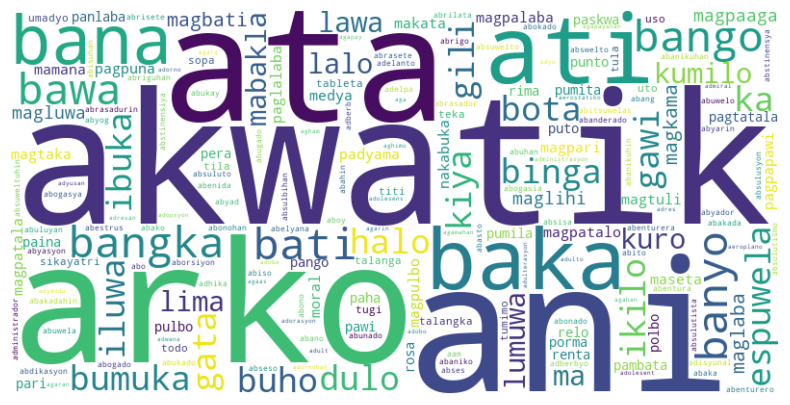

In [ ]:
# Visualize the word cloud for the neutral sentiment
neutral_words = tagalog_df[tagalog_df['sentiment'] == 'neutral']['word']
all_neutral_words = ' '.join(neutral_words)

neutral_wordcloud = WordCloud(width=800, height=400, background_color='white')
neutral_wordcloud.generate(all_neutral_words)

plt.figure(figsize=(10, 5))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### **Model Training**

In [100]:
# Separate the dataset into features and labels
X = tagalog_df['word']
y = tagalog_df['sentiment']

In [ ]:
# Train the model using Tfidf and Support Vector Classifier
sentiment_model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', probability=True))
sentiment_model.fit(X, y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('svc', SVC(kernel='linear', probability=True))])

#### **Model Evaluation**

In [ ]:
# Evaluate the model performance using accuracy score
y_pred = sentiment_model.predict(X)
print('Accuracy:', accuracy_score(y, y_pred))

Accuracy: 1.0


In [ ]:
# Evaluate the model performance using classification report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      8848
     neutral       1.00      1.00      1.00     22501
    positive       1.00      1.00      1.00      4507

    accuracy                           1.00     35856
   macro avg       1.00      1.00      1.00     35856
weighted avg       1.00      1.00      1.00     35856



In [ ]:
# Function to remove punctuation, numbers and convert to lowercase
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text

# Function to predict sentiment by each word and return the aggregated sentiment
def predict_sentiment(sentence):
    sentence = preprocess_text(sentence)
    words = sentence.split()
    
    # Predict sentiment for each word
    pred_class = sentiment_model.predict(words)
    pred_proba = sentiment_model.predict_proba(words)

    # Create a DataFrame for prediction computations
    predictions = pd.DataFrame({'Sentiment': pred_class, 'Probability': pred_proba.max(axis=1)})
    prediction = predictions.groupby('Sentiment')['Probability'].sum().idxmax()
    prediction_prob = predictions.groupby('Sentiment')['Probability'].sum().max()
    prediction_prob = round(prediction_prob, 2)

    return prediction, prediction_prob

# Test the prediction function with a sample sentence
sample_sentence = 'Mahirap mag-aral ng gutom'
predicted_sentiment, predicted_prob = predict_sentiment(sample_sentence)
print('Sentiment:', predicted_sentiment)
print('Probability:', predicted_prob)

Sentiment: negative
Probability: 2.49
